<a href="https://colab.research.google.com/github/Takaros96/K-Means-Clustering-World-Happiness-Report/blob/main/Courera_guided_projects_K_Means_Clustering_101_World_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bubbly

  Preparing metadata (setup.py) ... done
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5415 sha256=3ec2deb313ec8480c680b4d2ca11e4589d5cdff98a589c9905052054009cf249
  Stored in directory: /root/.cache/pip/wheels/dc/b4/ab/043c77f064dbbb38983593a3bed54363cc1910d0fb20ba6f66
Successfully built bubbly


In [ ]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot,iplot
from plotly.offline import iplot

In [ ]:
df=pd.read_csv('/content/happiness_report.csv')

In [ ]:
df[df['Country or region']=='Greece']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.0,0.034


In [ ]:
df.duplicated().sum()#number of duplicated rows

0

In [ ]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
fig=plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

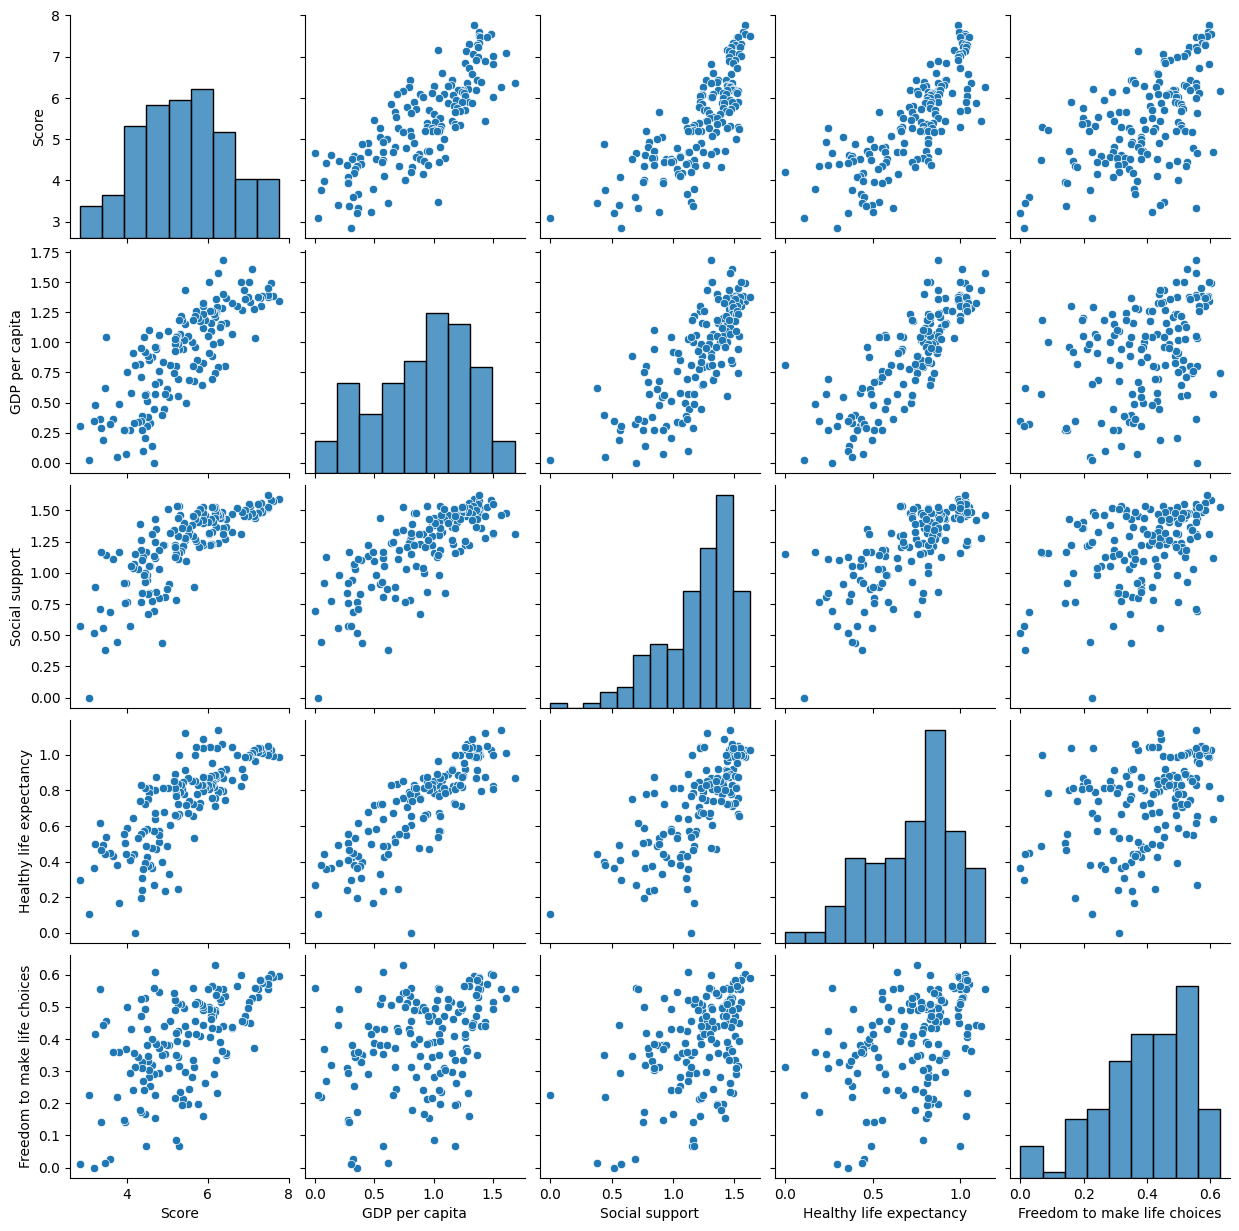

In [ ]:
sns.pairplot(df[['Score','GDP per capita','Social support','Healthy life expectancy',
                 'Freedom to make life choices']])#all the scatterplots between features selected

<ipython-input-21-d2635998f0a5>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-21-d2635998f0a5>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-21-d2635998f0a5>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

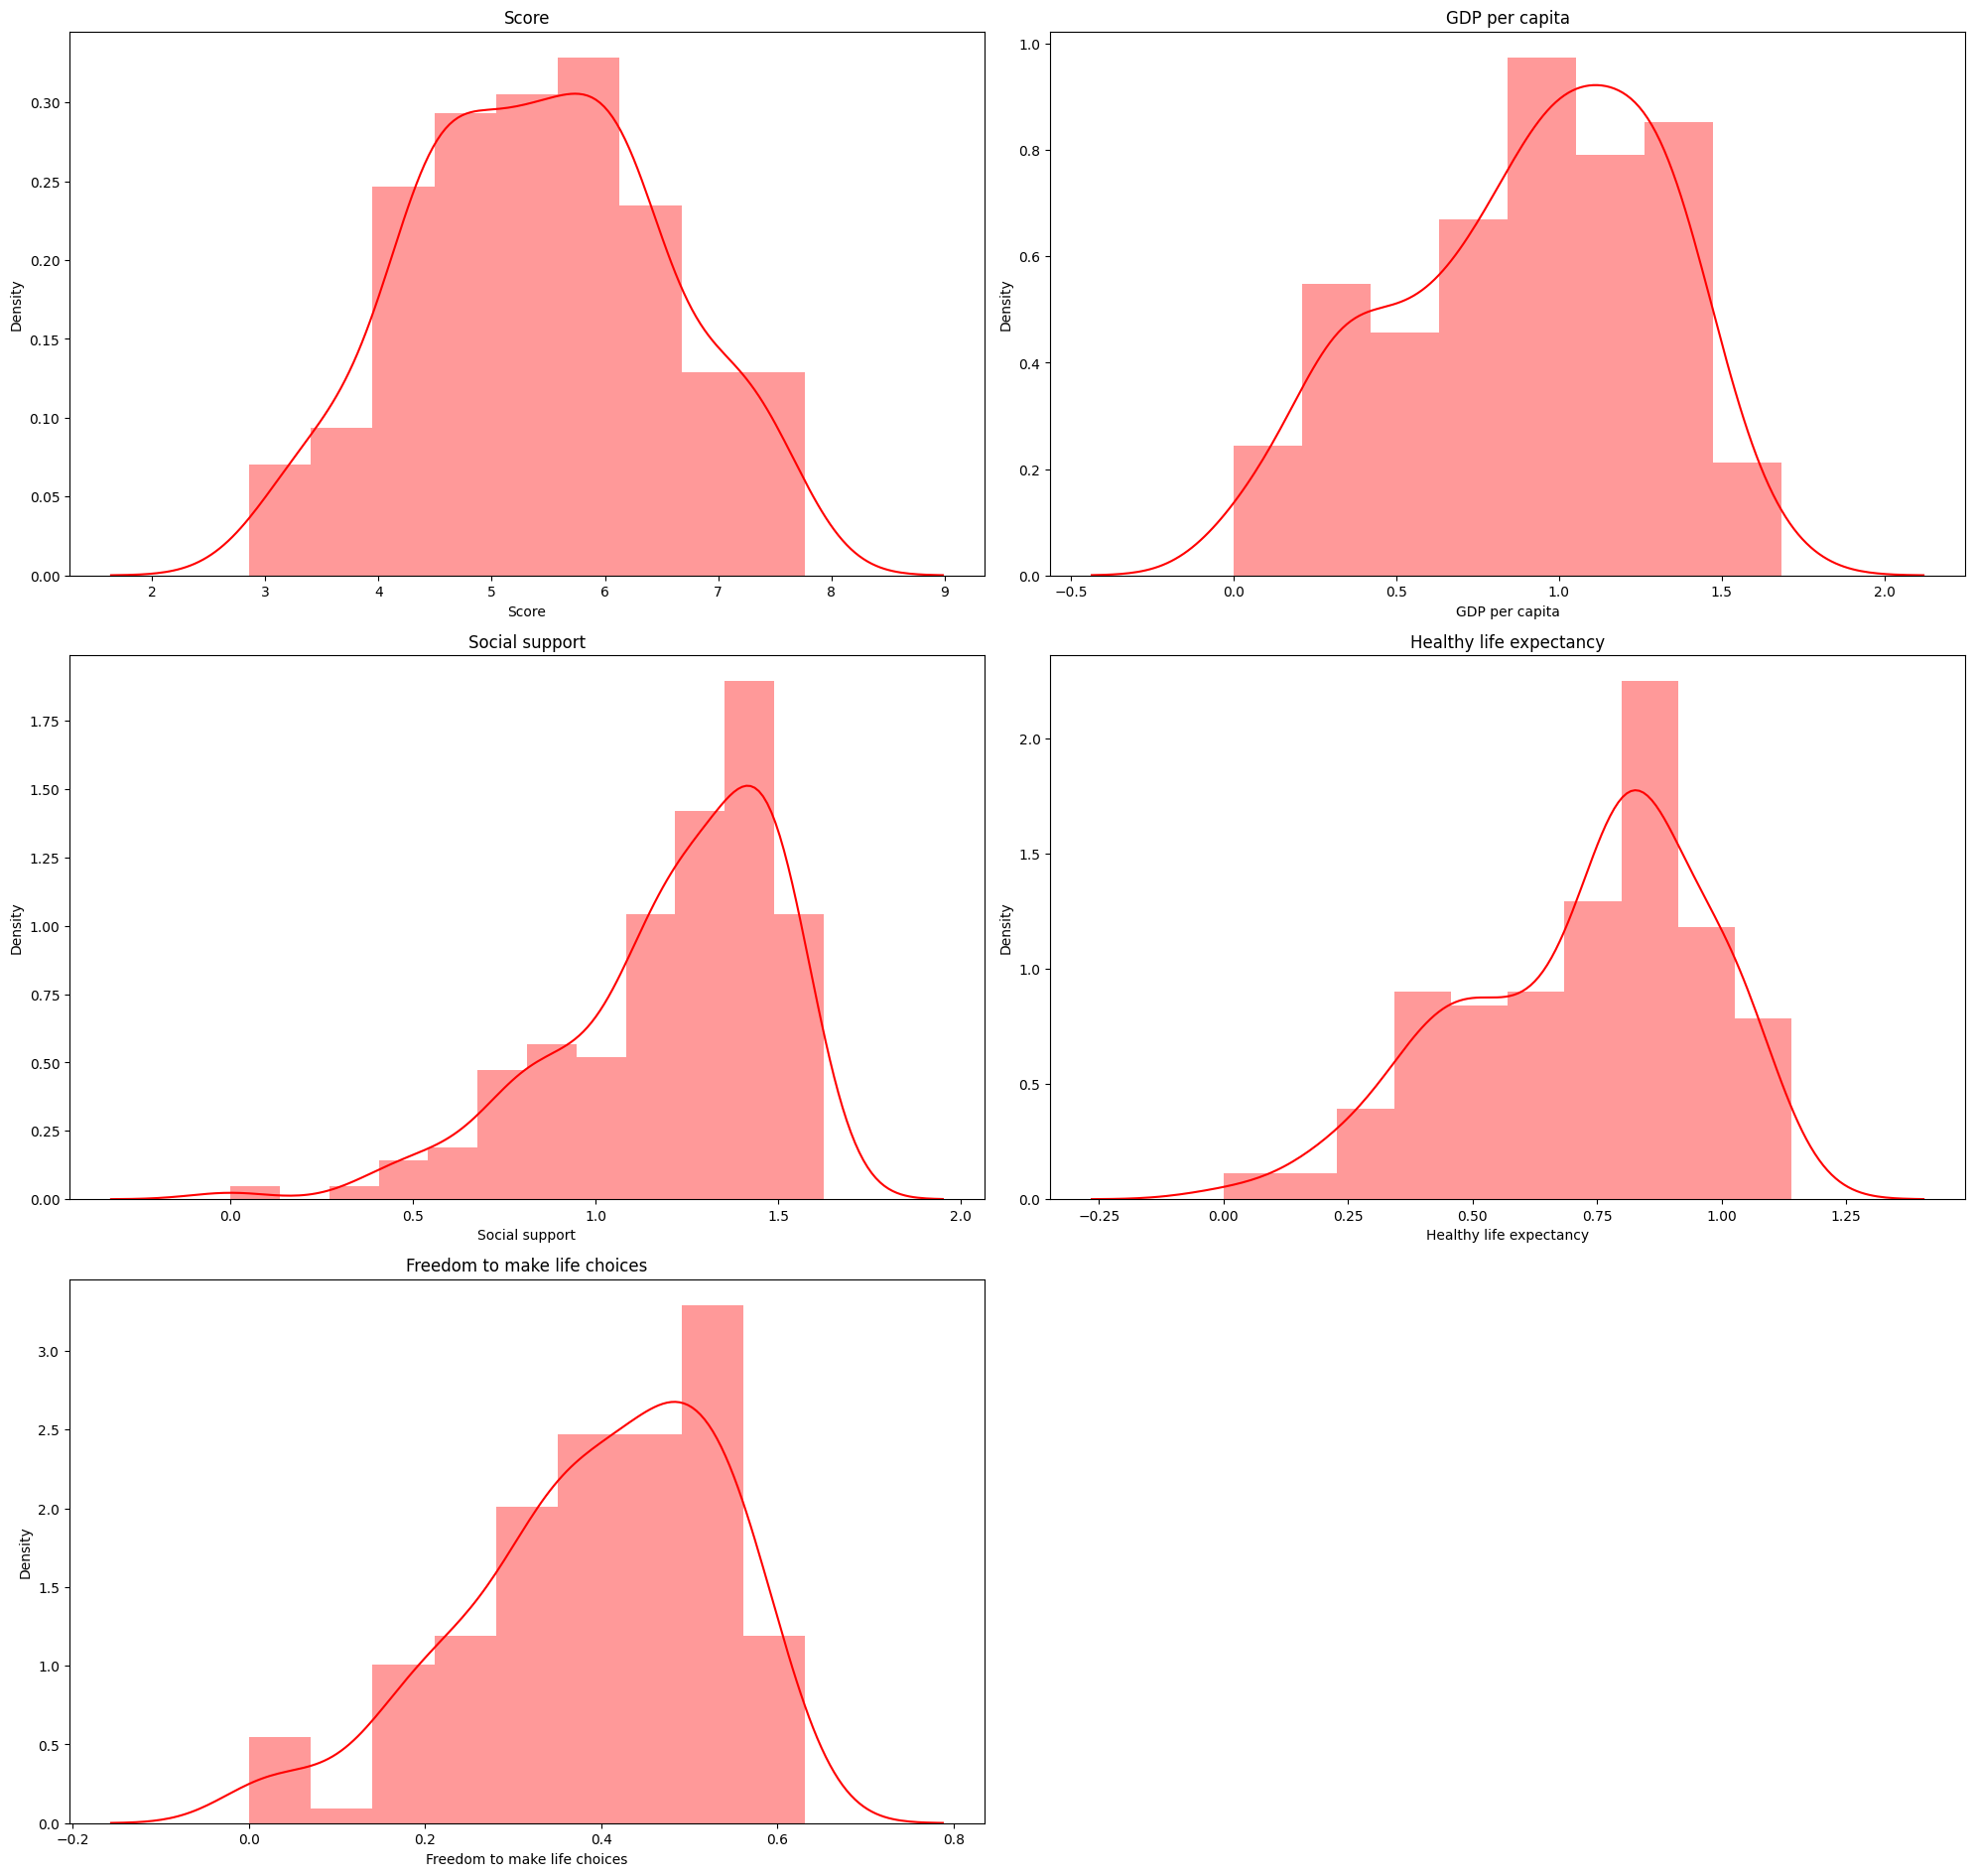

In [ ]:
columns=['Score','GDP per capita','Social support','Healthy life expectancy',
                 'Freedom to make life choices']

plt.figure(figsize=(20,50))
for i in range(len(columns)):
  plt.subplot(8,2,i+1)
  sns.distplot(df[columns[i]],color='r')
  plt.title(columns[i])

  plt.tight_layout()

In [ ]:
fig=px.scatter(df,x='GDP per capita',y='Score',text='Country or region')
fig.show()

In [ ]:
fig=px.scatter(df,x='GDP per capita',y='Score',text='Country or region',size='Overall rank'
,color='Country or region',hover_name='Country or region',trendline='ols')

fig.update_traces(textposition='top center')
fig.update_layout(title_text='Happiness core vs GDP per Capita',height=1000)
fig.show()

In [ ]:
df_seg=df.drop(columns=['Overall rank','Country or region','Score'])

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df_seg)

In [ ]:
scaled_data.shape

(156, 6)

In [ ]:
#k-means is an unsupervised learning algorithm
#it works by grouping some data points together(clustering) in an unsupervised fashion
#the algorithm groups observations with similar attribute values
#together by measuring the euclidian distance between points


In [ ]:
#the elbow method is a heuristic method  of interpretation and validation of
#consistency within cluster analysis designed to help find the appropriate number
#of clusters in a dataset
#if the line chart looks like an arm,the the elbow of the arm is the value of k
#that is the best

In [ ]:
scores=[]

range_values=range(1,20)

for i in range_values:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(scaled_data)
  scores.append(kmeans.inertia_)

plt.plot(scores,'bx-')
plt.title('Finding right number of clusters')
plt.xlabel("Cluster")
plt.ylabel('Scores')
plt.show()

In [ ]:
kmeans=KMeans(3)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [ ]:
labels=kmeans.labels_#asociation of data point to a cluster

In [ ]:
kmeans.cluster_centers_.shape#a 3 by 6 matrix

(3, 6)

In [ ]:
kmeans.cluster_centers_

array([[-1.26422926, -1.1321435 , -1.24034126, -0.47156319,  0.26057036,
        -0.11435828],
       [ 1.0440483 ,  0.84045675,  0.88671774,  1.04395863,  1.20151704,
         1.46865179],
       [ 0.35269748,  0.34811966,  0.39301953, -0.09193823, -0.55644773,
        -0.43733865]])

In [ ]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[df_seg.columns])
cluster_centers

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,-1.264229,-1.132144,-1.240341,-0.471563,0.260570,-0.114358
1,1.044048,0.840457,0.886718,1.043959,1.201517,1.468652
2,0.352697,0.348120,0.393020,-0.091938,-0.556448,-0.437339


In [ ]:
#in order to undertand what these numbers mean,let's perform inverse transformation
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df_seg.columns])
cluster_centers

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.490503,1.720516,0.955528,0.457976,0.204238,0.122109
1,1.499555,1.721903,0.955948,0.457989,0.204239,0.122110
2,1.496844,1.721557,0.955851,0.457979,0.204238,0.122109


In [ ]:
y_kmeans=kmeans.fit_predict(scaled_data)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
labels.shape

(156,)

In [ ]:
df_cluster=pd.concat([df,pd.DataFrame({'cluster':labels})],axis=1)
df_cluster

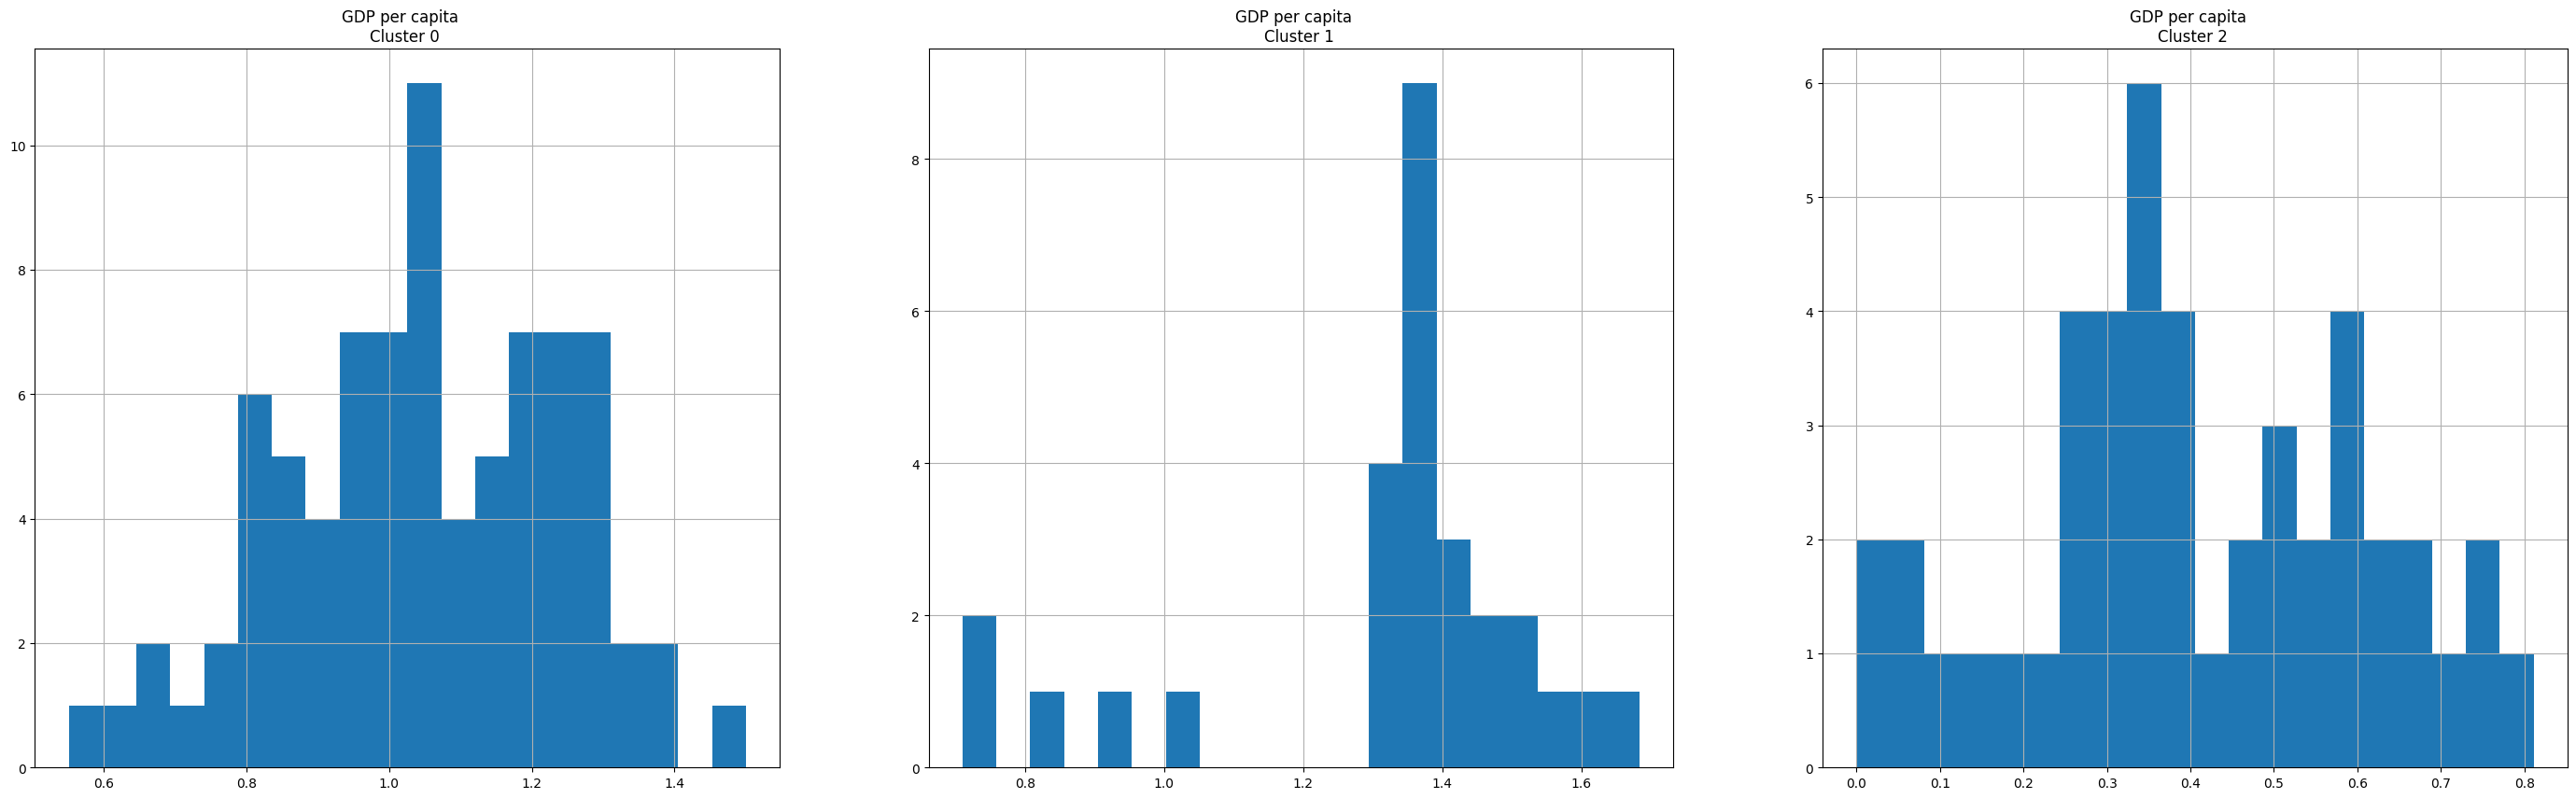

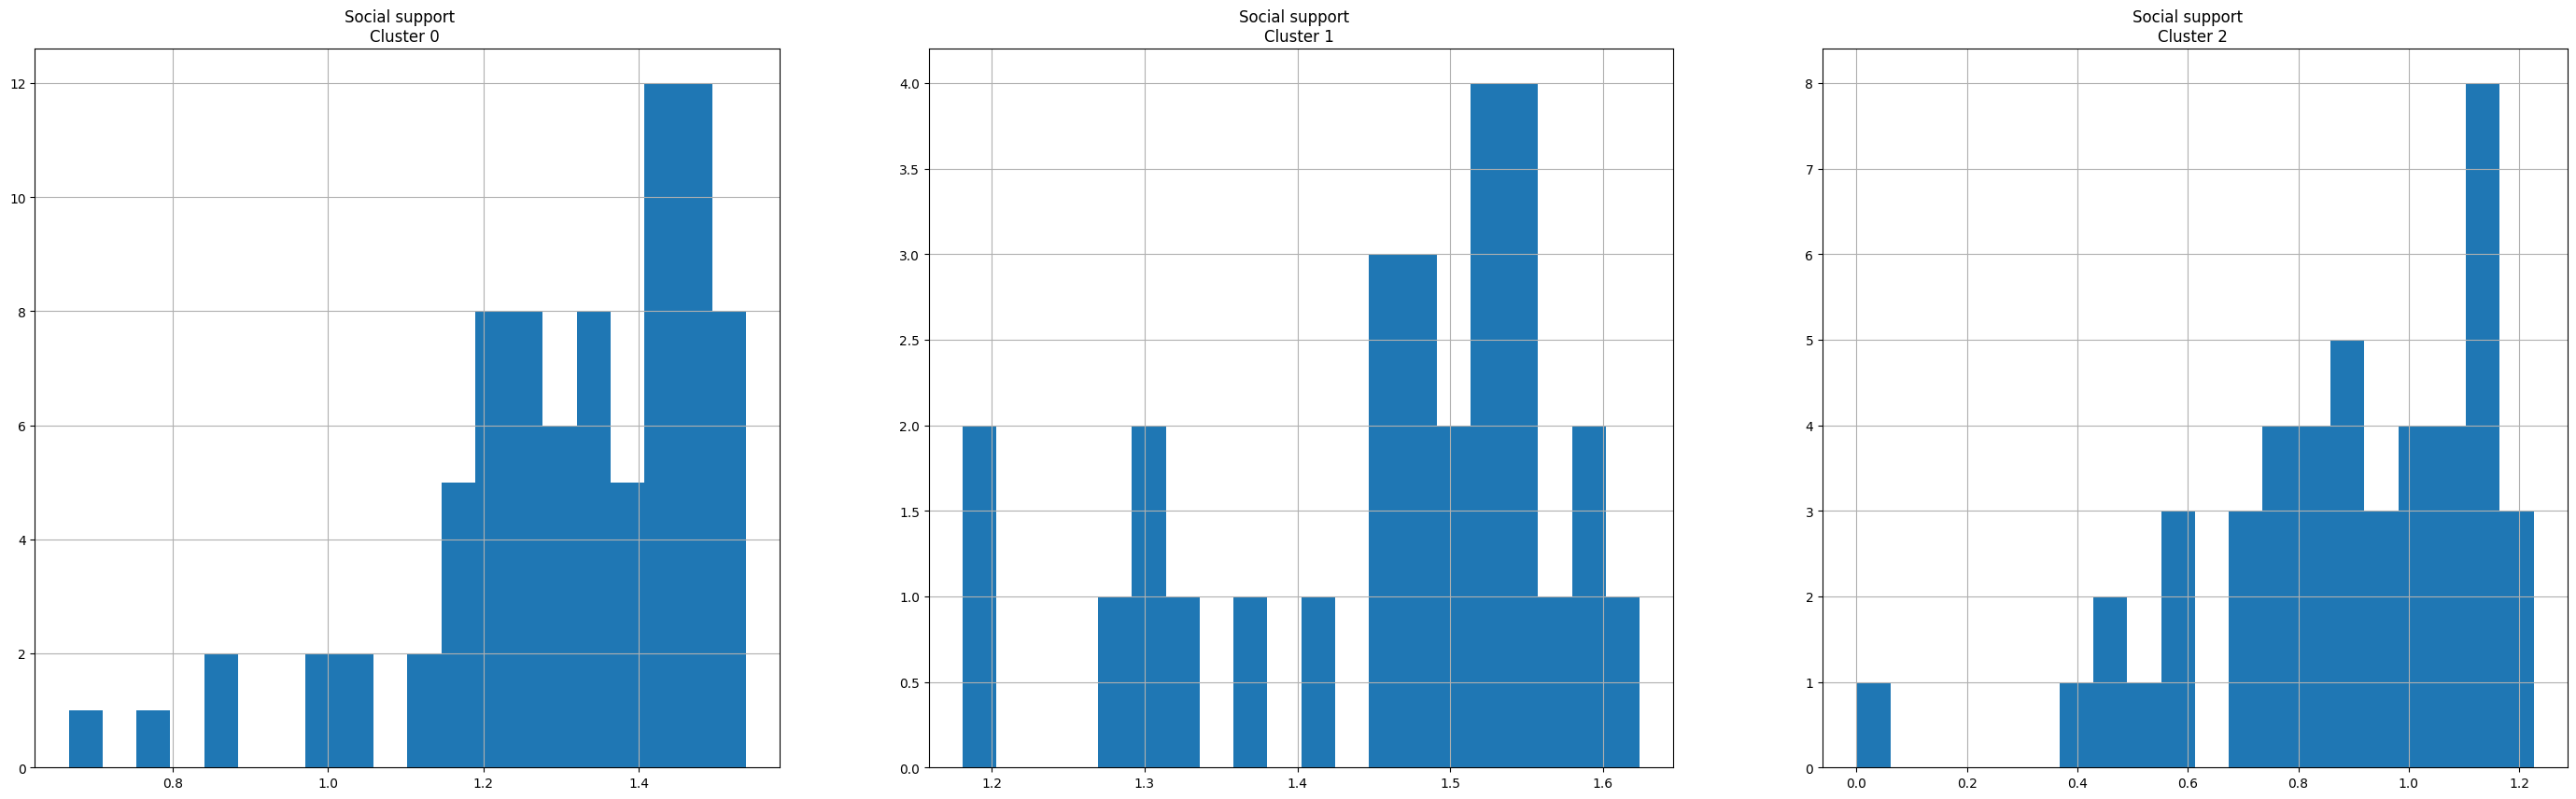

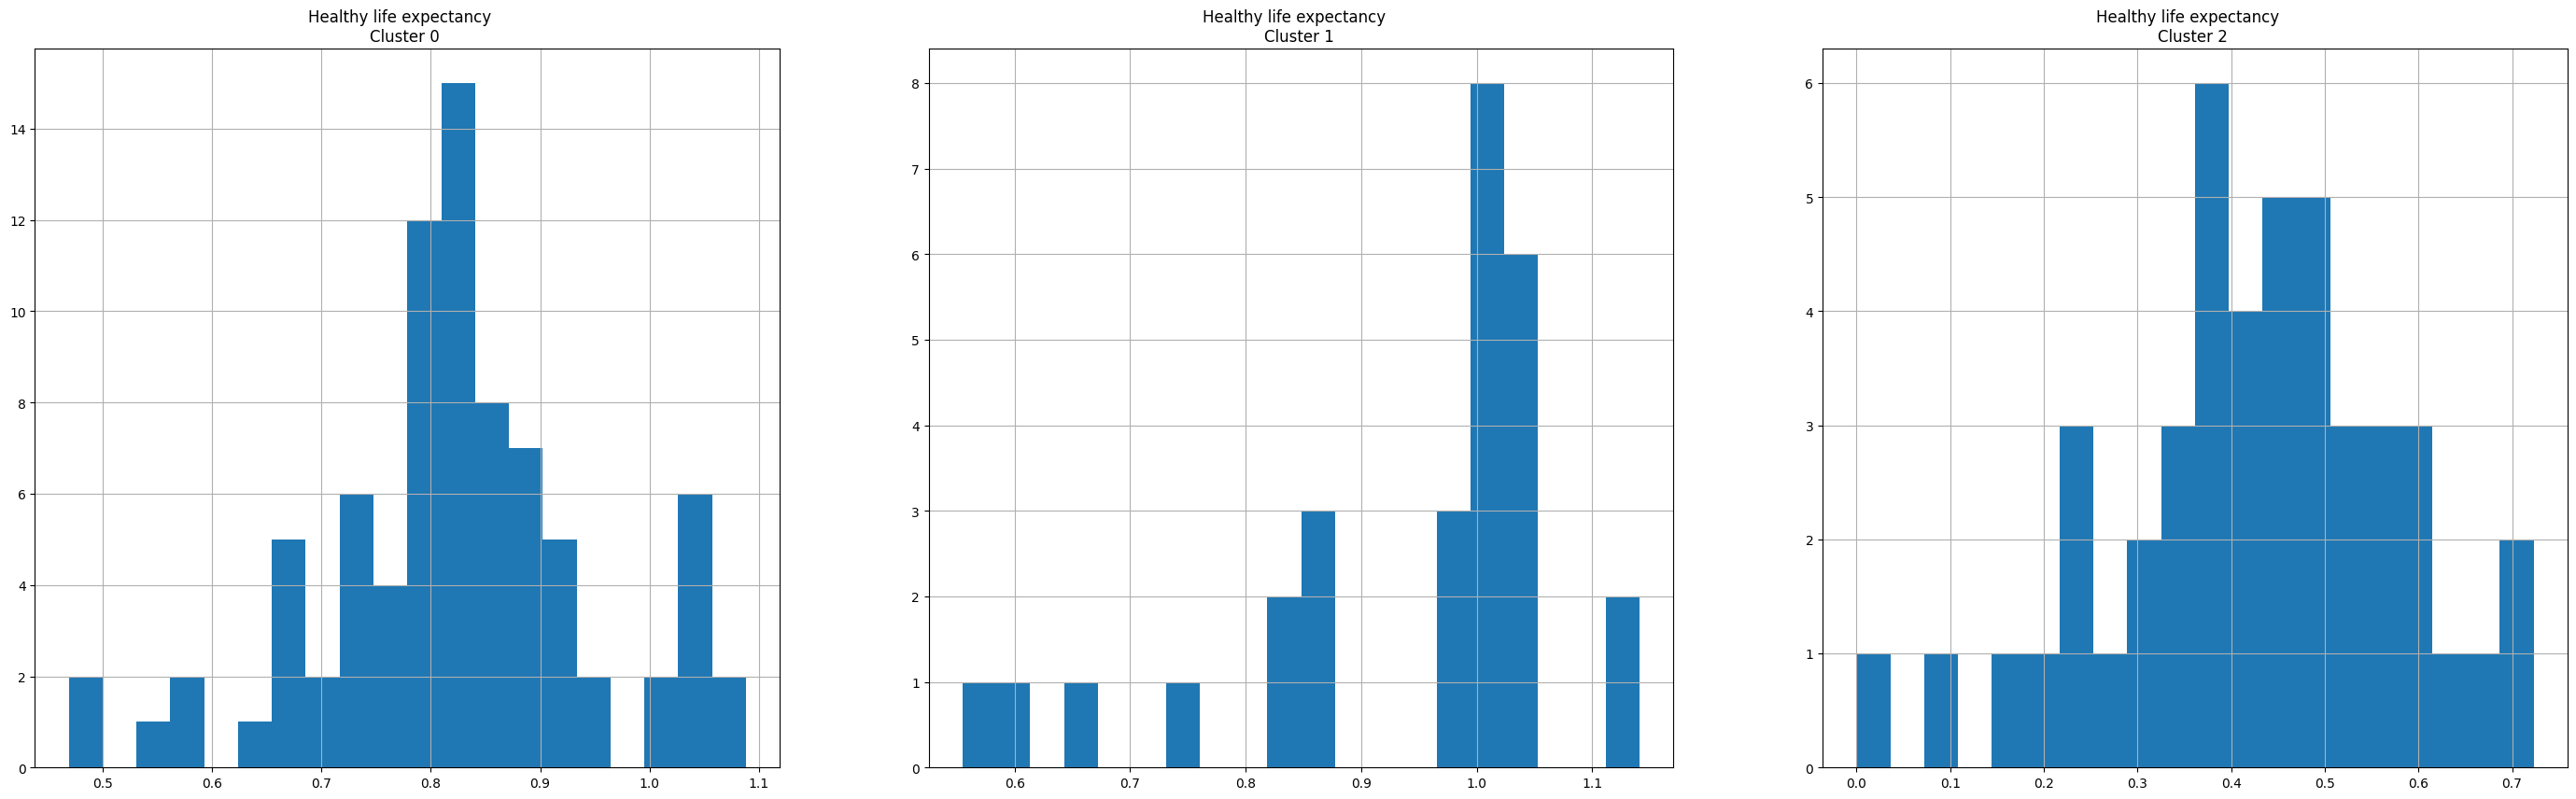

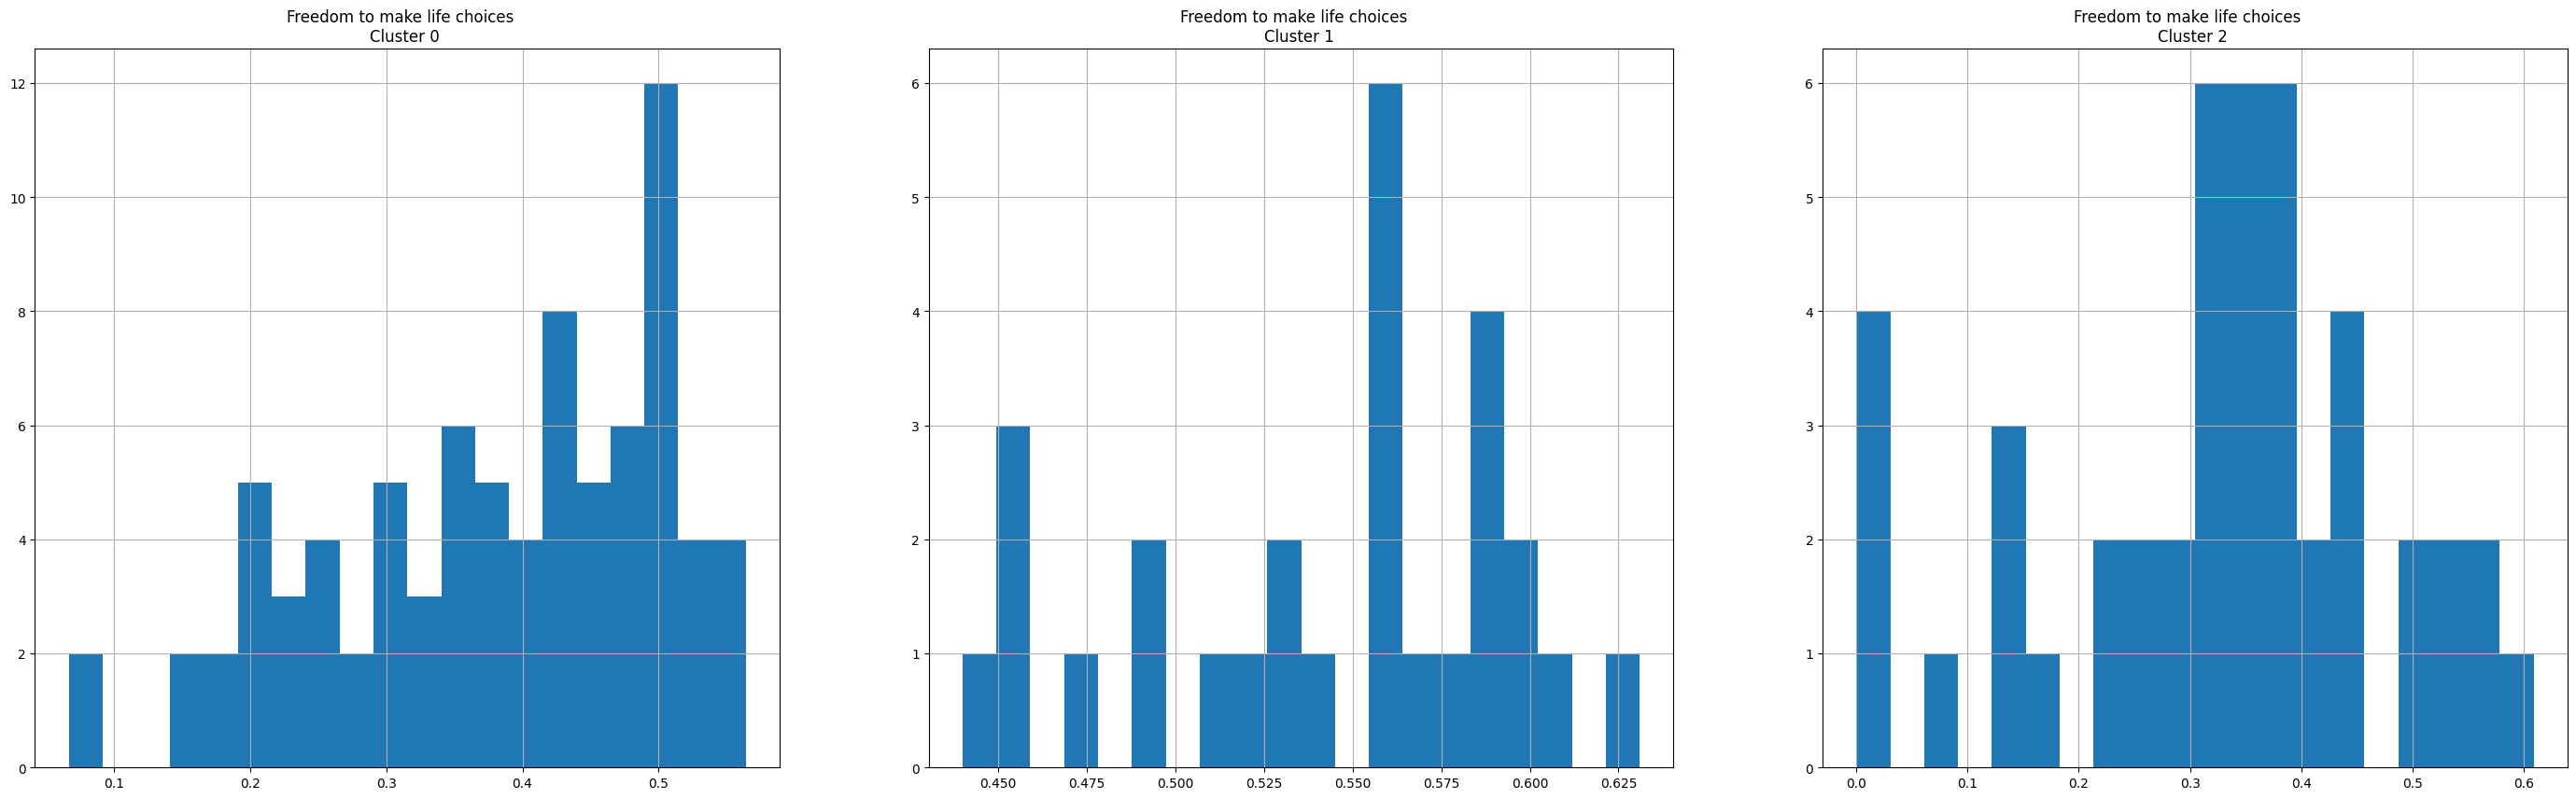

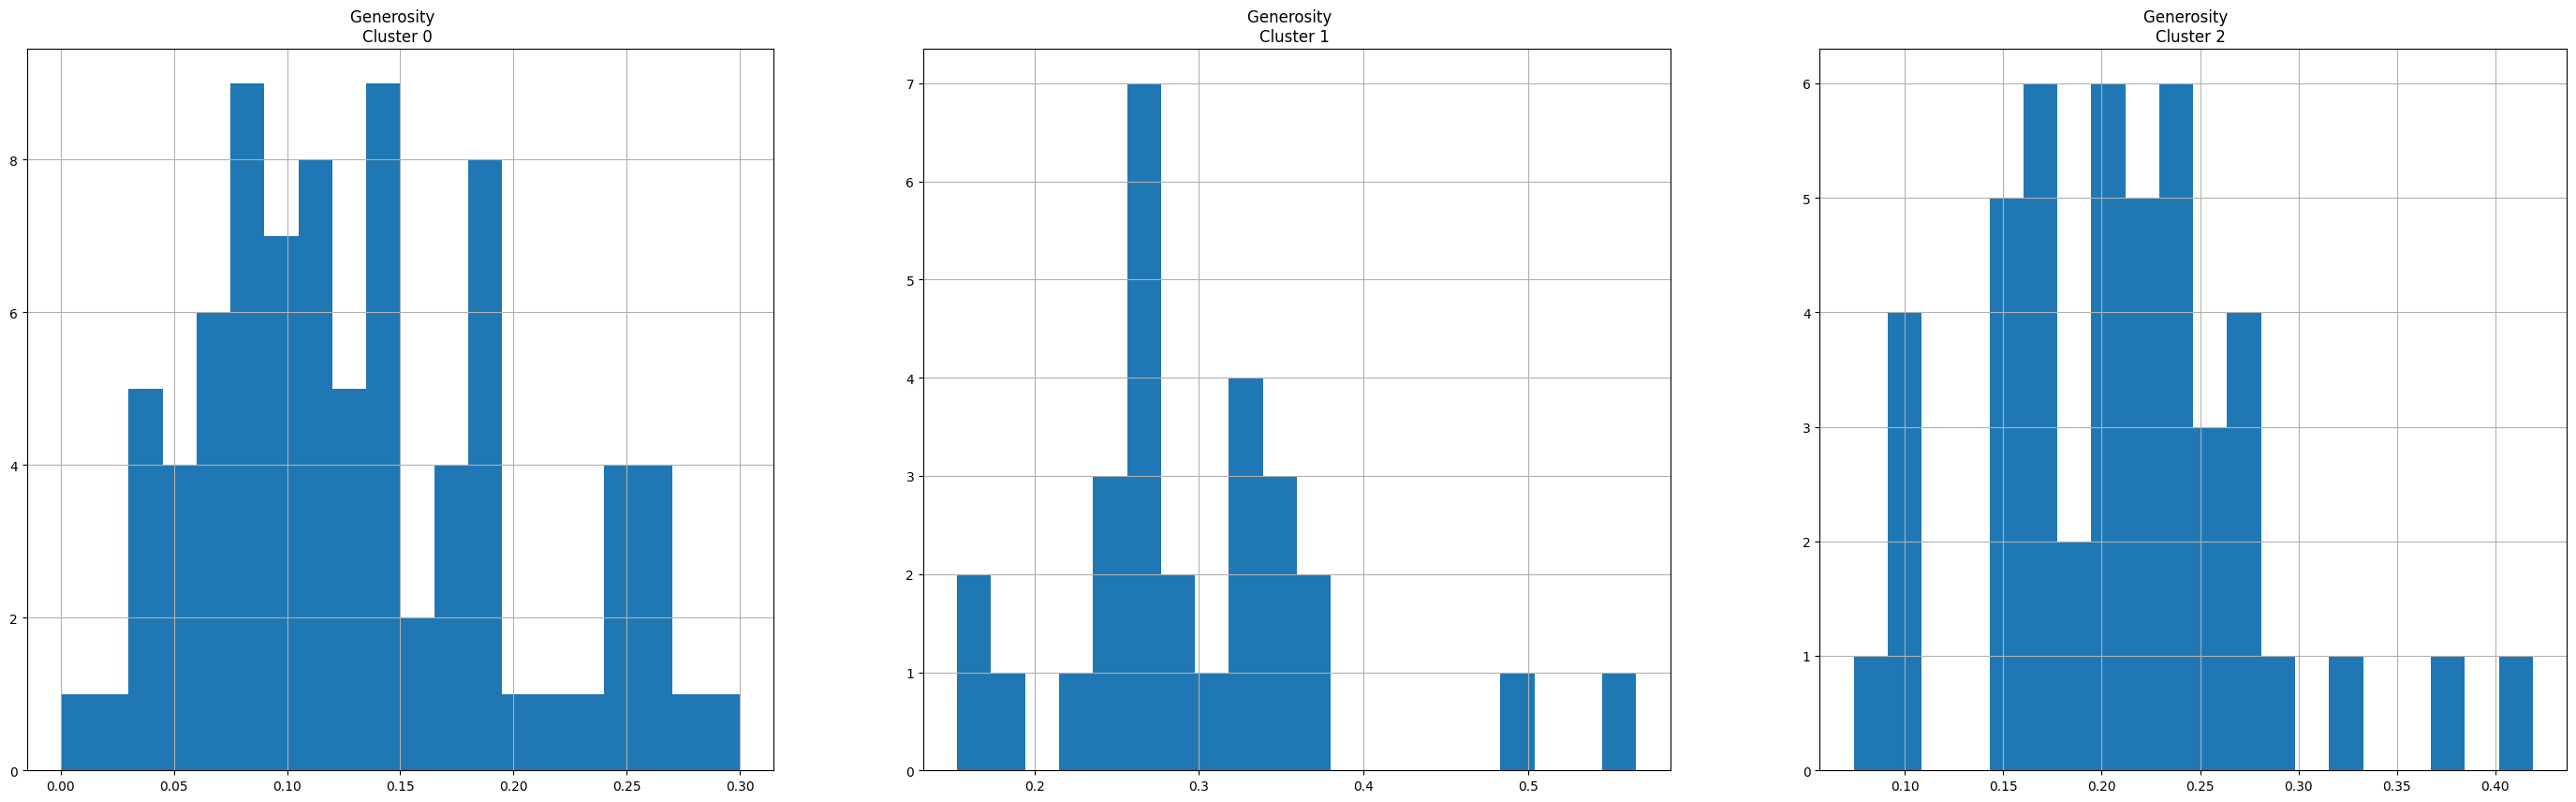

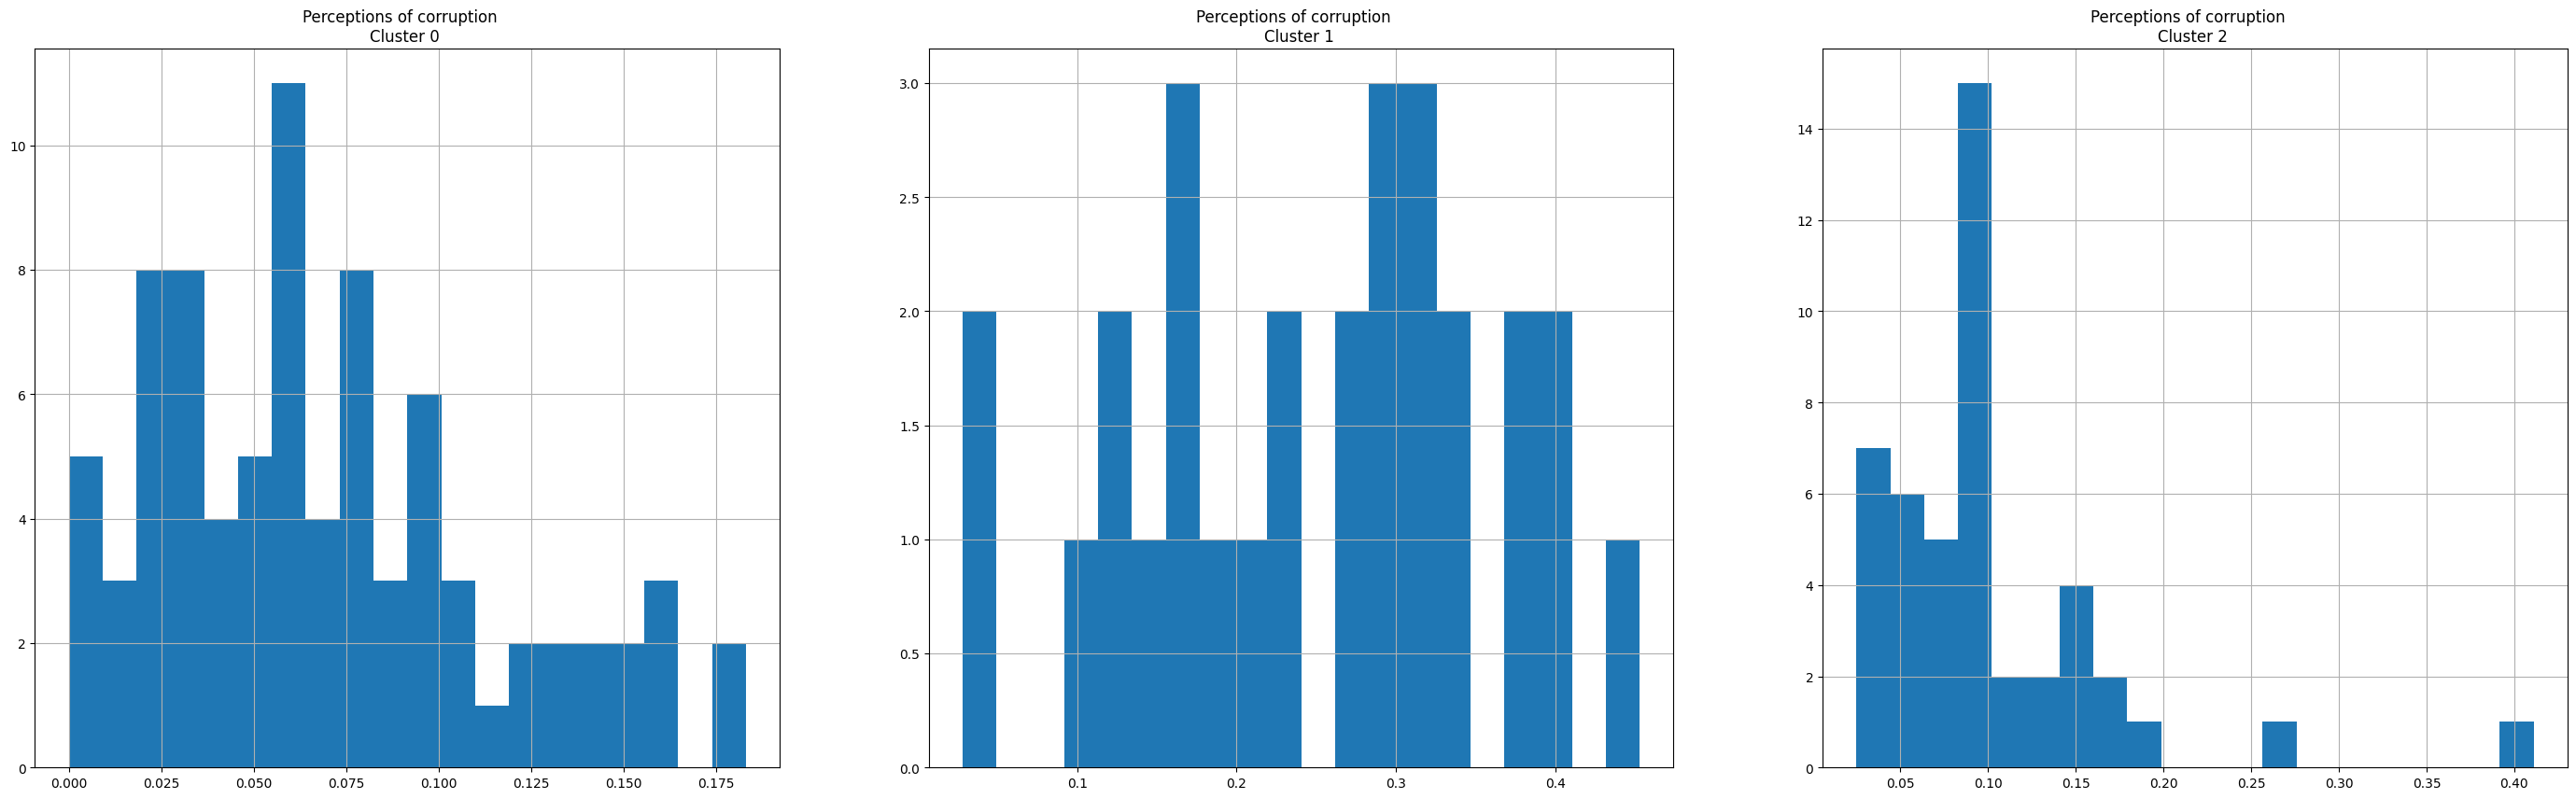

In [ ]:
for i in df_seg.columns:
  plt.figure(figsize=(35,10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster=df_cluster[df_cluster['cluster']==j]
    cluster[i].hist(bins=20)
    plt.title(f'{i}   \nCluster {j} ')

  plt.show()

In [ ]:
fig=px.scatter(df_cluster,x='cluster',y='Score',
               size='Overall rank',color='Country or region',hover_name='Country or region',
               trendline='ols')
fig.update_layout(
    title_text='Happiness Score vs Cluster'

)

fig.show()

In [ ]:
#Visualizing the cluster with repect to economy,corruption,gdp,rank and their scores

from bubbly.bubbly import bubbleplot

figure=bubbleplot(dataset=df_cluster,x_column='GDP per capita',y_column='Perceptions of corruption',
                  bubble_column='Country or region',
                  color_column='cluster',z_column='Healthy life expectancy',size_column='Score',
                  x_title='GDP per capita',y_title='Corruption',z_title='Life Expectancy',
                  title='Clusters bases Impact of Economy,Corryption and Life expectancy on Happiness Scores of Nations',
                  colorbar_title='Cluster',marker_opacity=1,colorscale='Portland',
                  scale_bubble=0.8,height=650)
iplot(figure,config={'scrollzoom':True})

In [ ]:
data=dict(type='choropleth',
          locations=df_cluster['Country or region'],
          locationmode='country names',
          colorscale='magenta',
          z=df_cluster['cluster'],
          text=df_cluster['Country or region'],
          colorbar={'title':'Clusters'})

layout=dict(title='Geographical Visualization of Cluster',
            geo=dict(showframe=True,projection={'type':'azimuthal equal area'}))

choromap3=go.Figure(data=[data],layout=layout)
iplot(choromap3)